In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
# pip install -i https://test.pypi.org/simple/ my_krml_25076922==2024.0.3.3

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import boxcox

In [3]:
path ='/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT2/Project/adv_mla_at2/data'

# sales_data = pd.read_csv(f'{path}/df_eda.csv')
df_cleaned = pd.read_csv(f'{path}/df_cleaned.csv')
# CAT_df_cleaned = pd.read_csv(f'{path}/df_cleaned_CATdtype.csv')

In [5]:
# from my_krml_25076922.features.data_processing import reduce_mem_usage

# # Apply the memory reduction function to the sales_train_long DataFrame
# sales_data = reduce_mem_usage(sales_data, int_cast=True, obj_to_category=True)

In [ ]:
sales_data['state_id'].value_counts()

In [ ]:
sales_data.isnull().sum()

In [ ]:
sales_data.describe()


In [ ]:
# plt.figure(figsize=(10, 6))
# sns.histplot(sales_data['total_sales'], kde=True, bins=30)
# plt.title('Distribution of Total Sales')
# plt.xlabel('Total Sales')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='state_id', y='total_sales', data=sales_data)
# plt.title('Total Sales Distribution by State')
# plt.xlabel('State')
# plt.ylabel('Total Sales')
# plt.show()

In [ ]:
# # Convert the 'date' column to datetime type if not already done
# sales_data['date'] = pd.to_datetime(sales_data['date'])

# # Aggregate sales by date to visualize overall sales trends
# sales_trend = sales_data.groupby('date')['total_sales'].sum().reset_index()

# plt.figure(figsize=(14, 6))
# sns.lineplot(x='date', y='total_sales', data=sales_trend)
# plt.title('Total Sales Over Time')
# plt.xlabel('Date')
# plt.ylabel('Total Sales')
# plt.show()

In [ ]:
# # Aggregate sales by state and date
# state_sales_trend = sales_data.groupby(['date', 'state_id'])['total_sales'].sum().reset_index()

# plt.figure(figsize=(14, 6))
# sns.lineplot(x='date', y='total_sales', hue='state_id', data=state_sales_trend)
# plt.title('Total Sales Over Time by State')
# plt.xlabel('Date')
# plt.ylabel('Total Sales')
# plt.legend(title='State')
# plt.show()

# # Aggregate sales by store and visualize for selected stores
# selected_stores = sales_data['store_id'].unique()[:3]  # Select first 3 stores for visualization
# store_sales_trend = sales_data[sales_data['store_id'].isin(selected_stores)]
# store_sales_trend = store_sales_trend.groupby(['date', 'store_id'])['total_sales'].sum().reset_index()

# plt.figure(figsize=(14, 6))
# sns.lineplot(x='date', y='total_sales', hue='store_id', data=store_sales_trend)
# plt.title('Total Sales Over Time by Store')
# plt.xlabel('Date')
# plt.ylabel('Total Sales')
# plt.legend(title='Store ID')
# plt.show()


In [ ]:
# # Pairplot to see relationships between numerical features
# sns.pairplot(sales_data[['total_sales', 'day_of_week', 'month']])
# plt.show()

# # Heatmap of correlations between numerical features
# plt.figure(figsize=(10, 6))
# correlation_matrix = sales_data.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()


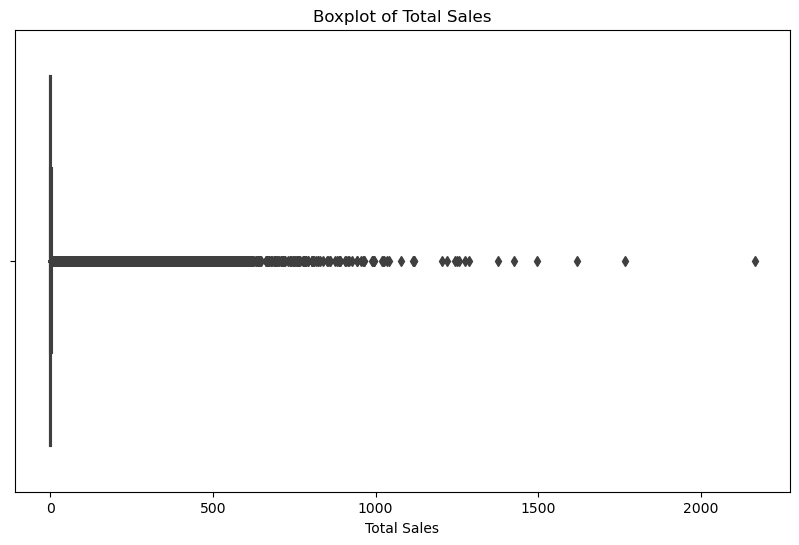

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a boxplot to visualize the distribution of total_sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales_data['total_sales'])
plt.title('Boxplot of Total Sales')
plt.xlabel('Total Sales')
plt.show()


In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = sales_data['total_sales'].quantile(0.25)
Q3 = sales_data['total_sales'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = sales_data[(sales_data['total_sales'] < lower_bound) | (sales_data['total_sales'] > upper_bound)]

# Display the number of outliers
print(f"Number of outliers in total_sales: {outliers.shape[0]}")

# Display a few outliers
outliers.head()


Number of outliers in total_sales: 6524111


,item_id,dept_id,cat_id,store_id,state_id,total_sales,day_of_week,month,year,is_event
21,HOBBIES_1_022,HOBBIES_1,HOBBIES,CA_1,CA,13.72,5,1,2011,0
22,HOBBIES_1_023,HOBBIES_1,HOBBIES,CA_1,CA,6.88,5,1,2011,0
28,HOBBIES_1_029,HOBBIES_1,HOBBIES,CA_1,CA,14.88,5,1,2011,0
49,HOBBIES_1_050,HOBBIES_1,HOBBIES,CA_1,CA,19.69,5,1,2011,0
57,HOBBIES_1_058,HOBBIES_1,HOBBIES,CA_1,CA,7.97,5,1,2011,0


In [16]:
sales_data.shape

(47107050, 10)

In [11]:
outliers['state_id'].value_counts()

state_id
CA    2932710
TX    1860360
WI    1731041
Name: count, dtype: int64

In [14]:
sales_by_state = sales_data.groupby('state_id')['total_sales'].describe()
sales_by_state

,count,mean,std,min,25%,50%,75%,max
state_id,,,,,,,,
CA,18842820.0,3.412234,10.083693,0.0,0.0,0.0,3.00,2164.0
TX,14132115.0,2.928594,9.029107,0.0,0.0,0.0,2.48,1767.0
WI,14132115.0,2.628742,7.941828,0.0,0.0,0.0,1.98,642.5


In [15]:
sales_by_item = sales_data.groupby('item_id')['total_sales'].describe()
sales_by_item

,count,mean,std,min,25%,50%,75%,max
item_id,,,,,,,,
FOODS_1_001,15450.0,1.410162,2.813507,0.0,0.0,0.00,2.24,53.75
FOODS_1_002,15450.0,3.379679,6.648425,0.0,0.0,0.00,7.88,75.80
FOODS_1_003,15450.0,2.162059,3.788114,0.0,0.0,0.00,2.88,63.38
FOODS_1_004,15450.0,12.507871,15.447701,0.0,0.0,7.12,19.58,206.50
FOODS_1_005,15450.0,3.724532,7.456277,0.0,0.0,0.00,3.54,106.20
...,...,...,...,...,...,...,...,...
HOUSEHOLD_2_512,15450.0,2.411344,4.528758,0.0,0.0,0.00,3.97,67.50
HOUSEHOLD_2_513,15450.0,1.064331,3.097508,0.0,0.0,0.00,0.00,55.60
HOUSEHOLD_2_514,15450.0,3.126755,8.538236,0.0,0.0,0.00,0.00,94.90


In [10]:
outliers['is_event'].value_counts()

is_event
0    6001729
1     522382
Name: count, dtype: int64

In [17]:
from scipy import stats

# Calculate Z-scores for total_sales
z_scores = stats.zscore(sales_data['total_sales'])

# Find the outliers where Z-score is greater than 3 or less than -3
outliers_z = sales_data[(z_scores > 3) | (z_scores < -3)]

# Display the number of outliers
print(f"Number of outliers in total_sales using Z-score method: {outliers_z.shape[0]}")

# Display a few outliers
outliers_z.head()


Number of outliers in total_sales using Z-score method: 714645


,item_id,dept_id,cat_id,store_id,state_id,total_sales,day_of_week,month,year,is_event
75,HOBBIES_1_078,HOBBIES_1,HOBBIES,CA_1,CA,59.84,5,1,2011,0
86,HOBBIES_1_089,HOBBIES_1,HOBBIES,CA_1,CA,39.40,5,1,2011,0
103,HOBBIES_1_108,HOBBIES_1,HOBBIES,CA_1,CA,48.47,5,1,2011,0
288,HOBBIES_1_297,HOBBIES_1,HOBBIES,CA_1,CA,39.00,5,1,2011,0
355,HOBBIES_1_364,HOBBIES_1,HOBBIES,CA_1,CA,71.80,5,1,2011,0


/Users/vega7unk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


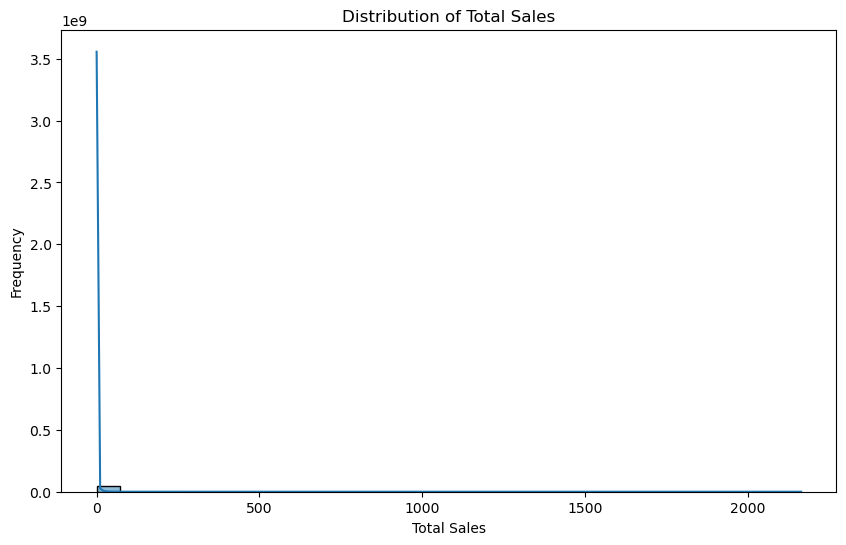

In [18]:
# Plot a histogram to check for distribution and potential outliers
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['total_sales'], kde=True, bins=30)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


In [21]:
# Check the skewness of 'total_sales' in the dataset
total_sales_skewness = sales_data['total_sales'].skew()
print(f"Skewness of total_sales: {total_sales_skewness}")



Skewness of total_sales: 13.204313063374315


Skewness of square root transformed total_sales: 2.237465834859933


/Users/vega7unk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


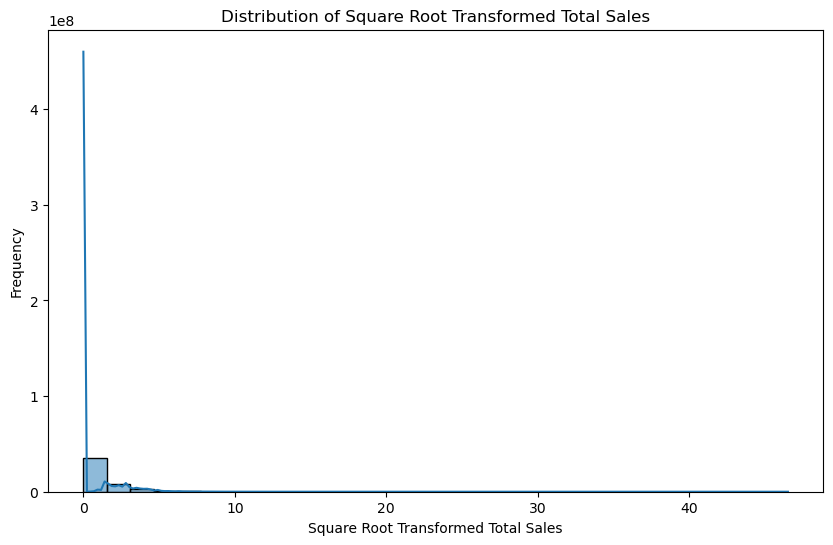

In [22]:
# Apply square root transformation
sales_data['total_sales_sqrt'] = np.sqrt(sales_data['total_sales'])

# Check skewness after square root transformation
total_sales_sqrt_skewness = sales_data['total_sales_sqrt'].skew()
print(f"Skewness of square root transformed total_sales: {total_sales_sqrt_skewness}")

# Plot the transformed data to visualize the impact
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['total_sales_sqrt'], kde=True, bins=30)
plt.title('Distribution of Square Root Transformed Total Sales')
plt.xlabel('Square Root Transformed Total Sales')
plt.ylabel('Frequency')
plt.show()

Skewness of log-transformed total_sales: 1.4619903261800058


/Users/vega7unk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


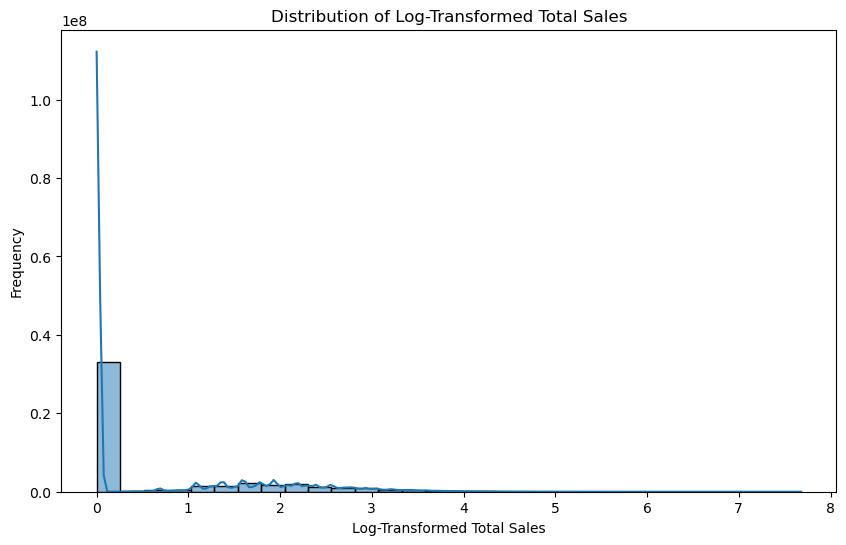

In [23]:
# Apply log transformation (adding 1 to avoid log(0))
sales_data['total_sales_log'] = np.log1p(sales_data['total_sales'])

# Check skewness after log transformation
total_sales_log_skewness = sales_data['total_sales_log'].skew()
print(f"Skewness of log-transformed total_sales: {total_sales_log_skewness}")

# Plot the log-transformed data to visualize the impact
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['total_sales_log'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Total Sales')
plt.xlabel('Log-Transformed Total Sales')
plt.ylabel('Frequency')
plt.show()


Skewness of Box-Cox transformed total_sales: 0.9311752030571208


/Users/vega7unk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


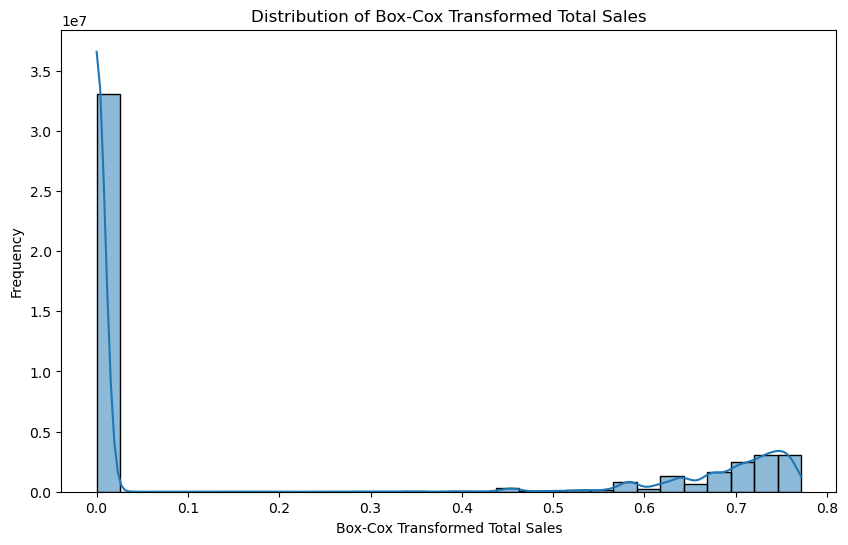

In [24]:
# Apply Box-Cox transformation (adding 1 to avoid issues with zero values)
sales_data['total_sales_boxcox'], fitted_lambda = boxcox(sales_data['total_sales'] + 1)

# Check skewness after Box-Cox transformation
total_sales_boxcox_skewness = pd.Series(sales_data['total_sales_boxcox']).skew()
print(f"Skewness of Box-Cox transformed total_sales: {total_sales_boxcox_skewness}")

# Plot the transformed data to visualize the impact
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['total_sales_boxcox'], kde=True, bins=30)
plt.title('Distribution of Box-Cox Transformed Total Sales')
plt.xlabel('Box-Cox Transformed Total Sales')
plt.ylabel('Frequency')
plt.show()


In [26]:
sales_data.head()

,item_id,dept_id,cat_id,store_id,state_id,total_sales,day_of_week,month,year,is_event,total_sales_sqrt,total_sales_log,total_sales_boxcox
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,5,1,2011,0,0.0,0.0,0.0
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,5,1,2011,0,0.0,0.0,0.0
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,5,1,2011,0,0.0,0.0,0.0
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,5,1,2011,0,0.0,0.0,0.0
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.0,5,1,2011,0,0.0,0.0,0.0


Skewness of square root transformed total_sales: 0.9611504867348452
Skewness of log-transformed total_sales: 0.9227127197137427
Skewness of Box-Cox transformed total_sales: 0.88586457053604


/Users/vega7unk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


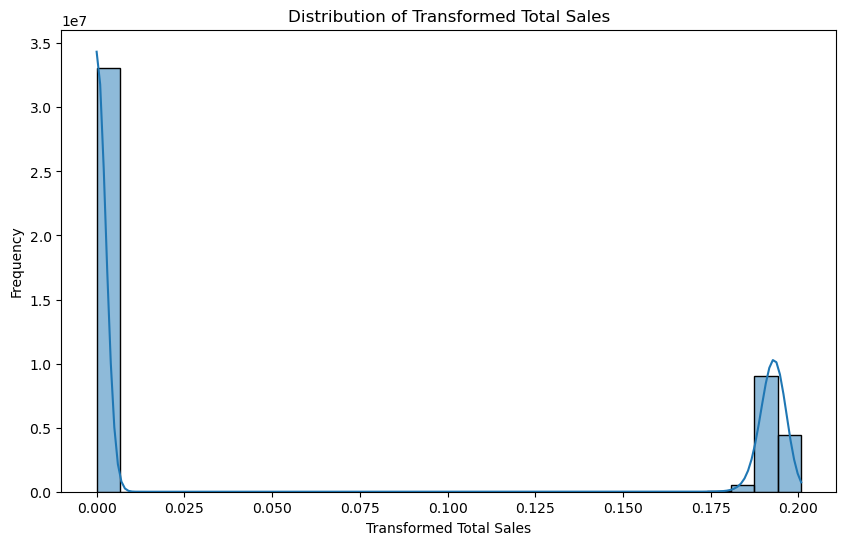

In [6]:
# Apply square root transformation
df_cleaned['total_sales'] = np.sqrt(df_cleaned['total_sales'])

# Check skewness after square root transformation
total_sales_sqrt_skewness = df_cleaned['total_sales'].skew()
print(f"Skewness of square root transformed total_sales: {total_sales_sqrt_skewness}")

# Apply log transformation (adding 1 to avoid log(0))
df_cleaned['total_sales'] = np.log1p(df_cleaned['total_sales'])

# Check skewness after log transformation
total_sales_log_skewness = df_cleaned['total_sales'].skew()
print(f"Skewness of log-transformed total_sales: {total_sales_log_skewness}")

# Apply Box-Cox transformation (adding 1 to avoid issues with zero values)
df_cleaned['total_sales'], fitted_lambda = boxcox(df_cleaned['total_sales'] + 1)

# Check skewness after Box-Cox transformation
total_sales_boxcox_skewness = pd.Series(df_cleaned['total_sales']).skew()
print(f"Skewness of Box-Cox transformed total_sales: {total_sales_boxcox_skewness}")

# Plot the transformed data to visualize the impact
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['total_sales'], kde=True, bins=30)
plt.title('Distribution of Transformed Total Sales')
plt.xlabel('Transformed Total Sales')
plt.ylabel('Frequency')
plt.show()

In [7]:
import os

# Define the directory path
output_dir = '../data'

# Save df_cleaned_scaled as a CSV file
df_cleaned.to_csv(os.path.join(output_dir, 'df_transformed.csv'), index=False)

# Print confirmation
print(f"Files saved successfully in '{output_dir}' directory.")

Files saved successfully in '../data' directory.
